# Block 1: Undirected Graphical Models
#### Adrià Tauste Campo, Ph.D.

In this block we will see:

0. Markov graphs 

1. Gaussian Graphical Models as an instance of Markov graphs (__Notebook practice__)

2. Pearson and Partial correlation measures: Estimation and  Null-hypothesis testing (__Notebook practice__)
                     
Reference:

-Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: data mining, inference, and prediction, Springer Series in Statistics (Chapter 17).

## Preliminaries




-A graph consists of a set of __nodes__ and a set of __edges__ (links) joining some pairs of nodes. 



-In Graphical Models, each node represents a __random variable__. 



-In an __undirected__ Graphical Models, edges have __no directional__ arrows.



-In Graphical models, the __absence__ of an edge between two nodes $\rightarrow$ pair of variables are __conditionally independent__, given the other variables.


## Main challenges

> 1. __Model selection__ (choosing structure of the graph)

> 2. Estimation of __edge parameters__ from data

> 3. Computation of __marginal (node) probabilities__ 


## Covered here

> Graphical Models for __Gaussian__ variables

> __Partial__ and __Pearson__ correlation estimation


## Not covered here

> Graphical Lasso estimation

> Graphical Models for discrete-valued variables


## Markov graphs: Definitions


-Two nodes $X$ and $Y$ are called __adjacent__ if there is an edge joining them $X\sim Y$. 

-A __path__ $X_1,X_2,\dots, X_n$ is a set of nodes that are joined, that is $X_{i−1}\sim X_i$ for i = 2,...,n. 

-A __complete graph__ is a graph with every pair of nodes joined by an edge. 



## Markov graphs: Properties



1. __Pairwise independency__: The absence of an edge implies that the corresponding random variables are __conditionally independent__ given the variables at the other nodes.

     $X$ and $Y$ not adjacent $\iff$ $X \perp Y|\text{rest}$
     
 
2. __Global Markov property__: If $A$, $B$ and $C$ are subgraphs, then $C$ is said to separate A and B if every path between $A$ and $B$ intersects a node in $C$. In Markov graphs, we have
 
     If $C$ separates $A$ and $B$ $\Rightarrow$ $A \perp B|C$
       
       
       
__Theoretical Result__: The set of graphs with associated probability distributions that satisfy the __pairwise__ and __global Markov__ properties are the same.        


## Example of a Markov graph (n=4)

\begin{equation}
X-Y-Z-W
\end{equation}


1. Implication of __Pairwise independency__ property:      $X \perp Z|\{Y,W\}$
     
 
2. Implications of __Global Markov__ property:     $X \perp Z|Y$ $\,\,$ $X \perp W|Y$ 

       

## Gaussian Graphical models

-We assume that the observations $\bar{X}=(X_1,X_2,\dots, X_p)$ follow a __multivariate Gaussian distribution__ with vector mean $\bar{\mu}$ and covariance matrix $\Sigma$. 

-Why multivariate Gaussian models?

Gaussian distributions are determined by __pairwise__ relationships.

_ __Consequence__: Multivariate Gaussian distributions encode a Markov graph, in which $\Theta=\Sigma^{-1}$, the precision matrix contains direct information about the __conditional independence__ between pairs of variables:

$\Theta_{i,j}=0$ $\iff$ $X_i \perp X_j|\text{rest}$ $\iff$ $X_i$ and $X_j$ are conditionally independent, given the other variables.




## Practice: Defining Gaussian Graphical models 

### a) Setting initial covariance and precision matrices (bivariate model)
We first set the theoretical covariance and precision matrices of the initial network.

In [1]:
import numpy as np
from numpy import linalg as LA
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as pp
%matplotlib inline

Theoretical covariance matrix
[[1.  0.8]
 [0.8 1. ]]
Theoretical precision matrix
[[ 2.77777778 -2.22222222]
 [-2.22222222  2.77777778]]


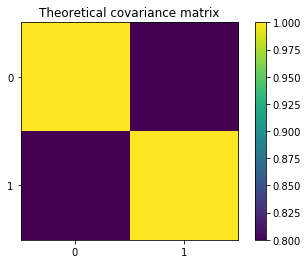

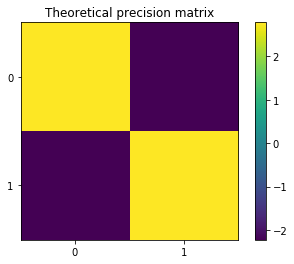

Eigenvalues check
[1.8 0.2]


In [2]:

#Start with a basic graph of 3 nodes
number_nodes=2

#Setting parameters
#mean
mean = np.array([0,0])
#mean = np.reshape(mean, (1,2))
#covariance matrix 
cov=np.zeros((2,2))
cov[0,0]=1
cov[0,1]=0.8
cov[1,0]=0.8
cov[1,1]=1


inv_cov=LA.pinv(cov)

#printing covariance matrix
print ("Theoretical covariance matrix")
print(np.matrix(cov))
print ("Theoretical precision matrix")
print(np.matrix(inv_cov))



pp.figure()
pp.title('Theoretical covariance matrix')
pp.imshow(cov,interpolation='nearest',origin='upper')
pp.xticks([0,1], ['0', '1'])
pp.yticks([0,1], ['0', '1'])
pp.colorbar()
pp.show()

pp.figure()
pp.title('Theoretical precision matrix')
pp.imshow(inv_cov,interpolation='nearest',origin='upper')
pp.xticks([0,1], ['0', '1'])
pp.yticks([0,1], ['0', '1'])
pp.colorbar()
pp.show()

    
#checking postive definitness propoerty of covariance
l, v = LA.eig(cov)
#print eigenvalues
print ("Eigenvalues check")
print(l)


### b) Connecting a 3rd node to a complete two-node graph
We consider the  parameters of an additional node to be connected to the existing network: mean, variance and connectivity weights. 

Parameters of the 3rd node: 

Mean is 0.00e+00
Variance 2.00e+00
Connectivity weights are
[[0. 1.]]


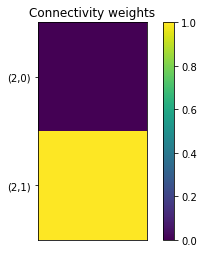

In [3]:
print("Parameters of the 3rd node: \n")

#1-Mean and Variance
mean_node = np.array([0])
sigma_node=2
print("Mean is %1.2e" %(mean_node))
print("Variance %1.2e" %(sigma_node))
#mean_node=np.reshape(mean_node, (1,1))
sigma_node=np.reshape(sigma_node, (1,1))

#2-Connectivity weights
Beta=np.array([0., 1.])
Beta=np.reshape(Beta, (2,1))
print("Connectivity weights are")
print(Beta.T)

pp.figure()
pp.title('Connectivity weights')
pp.imshow(Beta)
pp.xticks([], [])
pp.yticks([0,1], ['(2,0)', '(2,1)'])
pp.colorbar() 
pp.show()




### c) Checking multivariate Gaussianity with the 3rd node: Is the new model still Gaussian?
Check whether the 3 nodes still form a Gaussian model.

In [4]:
#Updating model

#updating the mean
mean_updated=np.concatenate(([mean, mean_node]))


#Computation of covariance factor of node 3
cov_zy=np.dot(cov,Beta)
cov_zy=np.reshape(cov_zy,(2,1))
  
#Updating the covariance matrix
conc1=np.concatenate((cov, cov_zy),axis=1)
conc2=np.concatenate((cov_zy.T, sigma_node),axis=1)
cov_updated=np.concatenate((conc1,conc2), axis=0)


#Checking positive definitness propoerty of covariance
l, v = LA.eig(cov_updated)
#print eigenvalues
print ("Eigenvalues")
print(l)

print("Is the new model still Gaussian?")

if np.all(l > 0): 
    print("Yes")
else: 
    print("No")

Eigenvalues
[3.18033705 0.64385346 0.17580949]
Is the new model still Gaussian?
Yes


### d) Update model

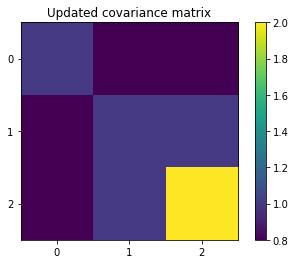

[[1.  0.8 0.8]
 [0.8 1.  1. ]
 [0.8 1.  2. ]]


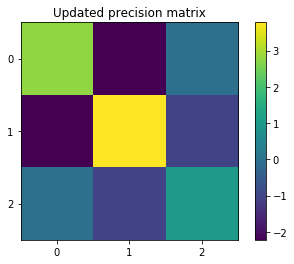

[[ 2.77777778 -2.22222222  0.        ]
 [-2.22222222  3.77777778 -1.        ]
 [ 0.         -1.          1.        ]]


In [5]:


#Updating the covariance matrix

pp.figure()
pp.title('Updated covariance matrix')
pp.imshow(cov_updated,interpolation='nearest',origin='upper')
pp.xticks([0,1,2], ['0', '1', '2'])
pp.yticks([0,1,2], ['0', '1', '2'])
pp.colorbar() 
pp.show()
print(np.matrix(cov_updated))

#Updating the precision matrix
## Computing the precision matrix
inv_cov_updated=LA.inv(cov_updated)

pp.figure()
pp.title('Updated precision matrix')
pp.imshow(inv_cov_updated,interpolation='nearest',origin='upper')
pp.xticks([0,1,2], ['0', '1', '2'])
pp.yticks([0,1,2], ['0', '1', '2'])
pp.colorbar()
pp.show()
print(inv_cov_updated)

## Estimating Graphical models: Pearson correlation coefficient

-The __unbiased estimator__ of the covariance matrix is

\begin{equation}
\hat{\Sigma}=\frac{1}{n-1} \sum_{i=1}^n (\mathbf{x}_i-\bar{\mathbf{x}})(\mathbf{x}_i-\bar{\mathbf{x}})^{T},   \,\,\,\,\, \bar{\mathbf{x}}=\frac{1}{n}\sum_{i=1}^n \mathbf{x}_i  
\end{equation}

\begin{align}
\hat{\Sigma}=
\begin{bmatrix} 
\hat{\sigma}_{ii} & &\\
\vdots &  \ddots &\\
\hat{\sigma}_{ij} & \cdots & \hat{\sigma}_{jj}
\end{bmatrix} 
\end{align}

from which __Pearson correlation__ coefficients can be directly obtained:

\begin{equation}
\rho_{\text{Pearson}}=\frac{\hat{\sigma}_{ij}}{\sqrt{ \hat{\sigma}_{ii} \hat{\sigma}_{jj}}}  
\end{equation}





## Estimating Graphical models: Partial correlation coefficient

-Given the sample covariance matrix, one obtains the __sample precision matrix__ $\hat{\Theta}=\hat{\Sigma}^{-1}$, which contains the elements $\hat{\theta}_{ij}$:

\begin{align}
\begin{bmatrix} 
\hat{\theta}_{ii} & &\\
\vdots &  \ddots &\\
\hat{\theta}_{ij} & \cdots & \hat{\theta}_{jj}
\end{bmatrix} 
\end{align}


Similarly, from the sample precision matrix, the __Partial correlation__ coefficients can be obtained:

\begin{equation}
\rho_{\text{Partial}}=\frac{-\hat{\theta}_{ij}}{\sqrt{\hat{\theta}_{ii} \hat{\theta}_{jj}}}  
\end{equation}

## Estimating Graphical models: Null Hypothesis testing 

-The following function of Pearson's correlation coefficient 


  \begin{equation}
       t=\hat{\rho}\sqrt{\frac{n-2}{1-\hat{\rho}^2}}
   \end{equation}

follows a __Student's t__ distribution in the null case (zero correlation).

 
- __Note__: Partial correlation can be computed via the Pearson correlation between error residuals.
 
- __Consequence__: p-values for both Pearson and Partial correlation can be obtained from the above $t$ statistic.



## Practice: Estimating Gaussian Graphical models from sampled data 


### a) Simulation of a multivariate Gaussian distribution
We here simulate samples of the multivariate Gaussian model describing the chain X-Y-Z-W.

In [6]:

number_nodes=4


mean = np.array([1,2,3,4])
#mean = np.array([0,0,0,0])

cov=np.zeros((4,4))
cov[0,0]=4
cov[0,1],cov[1,0],cov[1,1]=3,3,3
cov[0,2],cov[2,0],cov[1,2],cov[2,1],cov[2,2]=2,2,2,2,2
cov[0,3],cov[3,0],cov[1,3],cov[3,1],cov[2,3],cov[3,2],cov[3,3]=1,1,1,1,1,1,1

inv_cov=LA.pinv(cov)

#Generate 4-node Gaussian model
N=100000
X= np.random.multivariate_normal(mean,cov, N).T
X=np.reshape(X,(number_nodes, N))

print("Dimensions of the network data (variable nodes x samples)")
print(X.shape)



Dimensions of the network data (variable nodes x samples)
(4, 100000)


### b) Estimation of the covariance and precision matrices
Then, we estimate the whole covariance and precision matrices from the generated data observations.

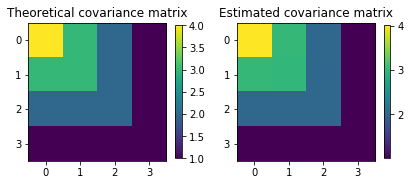

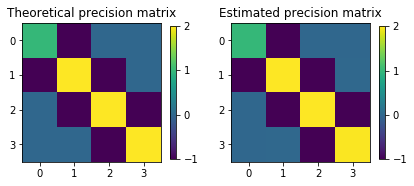

[[4.0121153  3.00632501 2.017415   1.00839132]
 [3.00632501 2.9994422  2.01262819 1.00518249]
 [2.017415   2.01262819 2.01900296 1.01131045]
 [1.00839132 1.00518249 1.01131045 1.00699734]]
Frobenius-norm error between original and estimated covariance matrix = 4.49e-02


[[ 1.00111093e+00 -1.00324376e+00  5.71618003e-04 -1.63515212e-03]
 [-1.00324376e+00  2.01227691e+00 -1.00724727e+00  7.54368657e-03]
 [ 5.71618003e-04 -1.00724727e+00  2.00310381e+00 -1.00682383e+00]
 [-1.63515212e-03  7.54368657e-03 -1.00682383e+00  1.99829481e+00]]
Frobenius-norm error between original and estimated precision matrix = 2.24e-02


In [7]:

#Estimate covariance and precision matrices
cov_hat=np.cov(X)

#Covariance matrix
pp.figure()

pp.subplot(121)
pp.title('Theoretical covariance matrix')
pp.imshow(cov,interpolation='nearest',origin='upper')
pp.colorbar(shrink=0.5)
pp.subplot(122)
pp.title('Estimated covariance matrix')
pp.imshow(cov_hat,interpolation='nearest',origin='upper')
pp.colorbar(shrink=0.5)
pp.tight_layout()
pp.show()

pp.figure()
pp.subplot(121)
#Precision matrix
inv_cov_hat=LA.pinv(cov_hat)
#pp.figure()
pp.title('Theoretical precision matrix')
pp.imshow(inv_cov,interpolation='nearest',origin='upper')
pp.colorbar(shrink=0.5)
pp.subplot(122)
pp.title('Estimated precision matrix')
pp.imshow(inv_cov_hat,interpolation='nearest',origin='upper')
pp.colorbar(shrink=0.5)

pp.tight_layout()
pp.show()
print(np.matrix(cov_hat))
print("Frobenius-norm error between original and estimated covariance matrix = %1.2e" %(LA.norm(cov-cov_hat)))
print('\n')
print(np.matrix(inv_cov_hat))
print("Frobenius-norm error between original and estimated precision matrix = %1.2e" %(LA.norm(inv_cov-inv_cov_hat)))




### c) Estimation of Pearson and Partial correlation measures
We here compute the Pearson and Partial correlation estimates as a function of the covariance and precision matrices.

[[0.         0.86662054 0.7088267  0.50168167]
 [0.86662054 0.         0.8178522  0.57837632]
 [0.7088267  0.8178522  0.         0.7092541 ]
 [0.50168167 0.57837632 0.7092541  0.        ]]


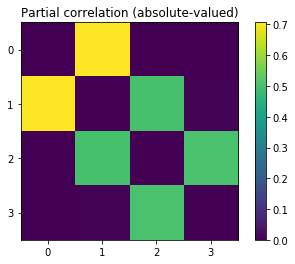

[[0.00000000e+00 7.06840611e-01 4.03657539e-04 1.15607838e-03]
 [7.06840611e-01 0.00000000e+00 5.01695838e-01 3.76192371e-03]
 [4.03657539e-04 5.01695838e-01 0.00000000e+00 5.03236319e-01]
 [1.15607838e-03 3.76192371e-03 5.03236319e-01 0.00000000e+00]]


In [8]:
   
mask_diag = np.eye(number_nodes,dtype=np.bool) # mask for diagonal elements
    
# Pearson correlation
FC = np.array(cov_hat)
FC /= np.sqrt(np.outer(FC.diagonal(),FC.diagonal()))
FC[mask_diag] = 0
        
# Partial correlation
PC = np.array(inv_cov_hat)
PC /= -np.sqrt(np.outer(PC.diagonal(),PC.diagonal()))
PC[mask_diag] = 0
    
        
pp.figure()
pp.title('Pearson correlation (absolute-valued)')
pp.imshow(abs(FC),interpolation='nearest',origin='upper')
pp.colorbar()
pp.xticks([0,1,2,3], ['0', '1', '2', '3'])
pp.yticks([0,1,2,3], ['0', '1', '2', '3'])
pp.show() 
print(np.matrix(abs(FC)))

pp.figure()
pp.title('Partial correlation (absolute-valued)')
pp.imshow(abs(PC),interpolation='nearest',origin='upper')
pp.colorbar()
pp.xticks([0,1,2,3], ['0', '1', '2', '3'])
pp.yticks([0,1,2,3], ['0', '1', '2', '3'])
pp.show() 
print(np.matrix(abs(PC)))

### d) Null-hypothesis significance testing of correlation coefficients

Finally, we make use of significane testig to extract a binary decision on the existence of functional and structural weights in the network. 


6.0
Significance level
0.05
Multiple comparison significance threshold
0.008333333333333333
100000
(100000, 5)


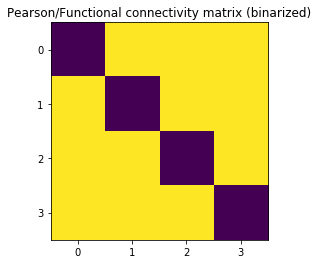

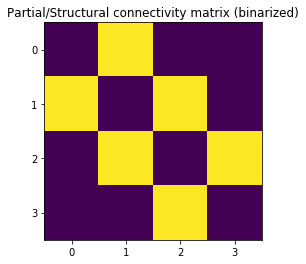

[[0.00000000e+00 7.06840611e-01 4.03657539e-04 1.15607838e-03]
 [7.06840611e-01 0.00000000e+00 5.01695838e-01 3.76192371e-03]
 [4.03657539e-04 5.01695838e-01 0.00000000e+00 5.03236319e-01]
 [1.15607838e-03 3.76192371e-03 5.03236319e-01 0.00000000e+00]]
[[0.00000000e+00 7.06840611e-01 4.03657539e-04 1.15607838e-03]
 [7.06840611e-01 0.00000000e+00 5.01695838e-01 3.76192371e-03]
 [4.03657539e-04 5.01695838e-01 0.00000000e+00 5.03236319e-01]
 [1.15607838e-03 3.76192371e-03 5.03236319e-01 0.00000000e+00]]


In [9]:
import numpy as np
from scipy import stats, linalg

def pearson_partial_corr_p_values(C):
    """
    Returns the p-values of Pearson/partial correlation using the statistic exact distribution 
    of the sample correlation coefficient
    
    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the p-value of Pearson/Partial correlation of C[:, i] and C[:, j]"""
    
    C = np.asarray(C)
    N = C.shape[0]
    p = C.shape[1]
    print(N)
    FC_pval = np.zeros((p, p), dtype=np.float)
    PC_pval = np.zeros((p, p), dtype=np.float)
    FC_corr = np.zeros((p, p), dtype=np.float)
    PC_corr = np.zeros((p, p), dtype=np.float)
    #Augmented with the constant term variable
    C=np.concatenate((C, np.ones((N, 1))),axis=1)
    print(C.shape)
    
    for i in range(p):
        PC_pval[i, i] = 1
        FC_pval[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p+1, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]
 
            
            pval = stats.pearsonr(C[:, j], C[:, i])[1]
            corr = stats.pearsonr(C[:, i], C[:, j])[0]
            FC_pval[i, j] = pval
            FC_pval[j, i] = pval
            FC_corr[i, j] = corr
            FC_corr[j, i] = corr
            
            
            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            pval = stats.pearsonr(res_i, res_j)[1]
            corr = stats.pearsonr(res_i, res_j)[0]
            PC_pval[i, j] = pval
            PC_pval[j, i] = pval
            PC_corr[i, j] = corr
            PC_corr[j, i] = corr
        
    return FC_pval, PC_pval,  FC_corr,  PC_corr

#Significance Levels
sign_th=0.05
number_comparisons=number_nodes*(number_nodes-1)/2
print(number_comparisons)
multiple_comparison_threshold=sign_th/number_comparisons
print("Significance level")
print(sign_th)
print("Multiple comparison significance threshold")
print(multiple_comparison_threshold)


#Significance testing
FC_pval, PC_pval, FC_corr, PC_corr=pearson_partial_corr_p_values(X.T)
FC_connectivity=FC_pval<multiple_comparison_threshold
PC_connectivity=PC_pval<multiple_comparison_threshold


pp.figure()
pp.title('Pearson/Functional connectivity matrix (binarized)')
pp.imshow(FC_connectivity,interpolation='nearest',origin='upper')
pp.xticks([0,1,2,3], ['0', '1', '2', '3'])
pp.yticks([0,1,2,3], ['0', '1', '2', '3'])

pp.figure()
pp.title('Partial/Structural connectivity matrix (binarized)')
pp.imshow(PC_connectivity,interpolation='nearest',origin='upper')
pp.xticks([0,1,2,3], ['0', '1', '2', '3'])
pp.yticks([0,1,2,3], ['0', '1', '2', '3'])
pp.show() 

print(np.matrix(abs(PC)))
print(np.matrix(abs(PC_corr)))
#print(np.matrix(PC_pval))




## Further suggested practice (synthetic data)

1- Generate data under different multivariate Gaussian models of sufficiently large dimension (e.g. 50-100 nodes). In each model, estimate the Partial and Pearson correlation matrices and identify the nodes whose edge coefficients experiment a greater difference between both matrices. How are these nodes marginally correlated with the rest of the network?



## Further suggested practice (real data)

2- In any data set where both functional and binarized structural data are provided, make different estimations of Partial and Pearson correlation matrices (with appropriate significance levels) and compare the difference (in Frobenius norm) between the structural matrix and your Partial/Pearson correlation matrices. Which correlation matrix tends to be more similar to the structural one? How can you interprete these findings?